# PCA: Principal Components Analysis - Análisis de Componentes Principales

* Sea X (tamaño $n\times d$): el dataset completo con n muestras en $R^d$ (d variables) sin considerar y (target con etiquetas/labels)
* Calcula el vector promedio d-dimensional (en $R^d$, un vector conteniendo la media de cada variable/columna).
* Calcula la matriz de covarianzas (scatter matrix) de todo el dataset. 
* Representa la dispersión de los datos alrededor del vector promedio. Se puede considerar los datos centrados $X_c$: cada observación (fila) se le resta el vector de medias (es lo mismo que a cada columna se le reste la media de la columna).
* Calcula los vectores $v_1,v_2,...,v_d$ (en $R^{d\times 1}$, de norma 1) y sus valores propios $\lambda_1,\lambda_2,...,\lambda_d$
* Valores propios ordenados de forma decreciente y se eligen los primeros $k$ construyendo la matriz $W$ (tamaño $d\times k$) donde cada columna es un vector propio normalizado (de norma o longitud 1). Estos vectores definen un nuevo espacio de dimensión $k$ (con $k<d$).
* Proyecta las n muestas en el nuevo espacio haciendo el producto punto de cada observación (centrada) con cada vector propio realizando la multiplicación matricial:  $(X_c)*W$ (tamaño $n\times k$ con n muestras proyectadas en el nuevo espacio de dimensión k ($R^k$).


**Datos sintéticos: generamos un conjunto de datos (con n=40 muestras y d=3 variables)**

In [36]:
import numpy as np

np.random.seed(23423784) # random seed for consistency

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,4,0],[0,0,3]])#np.array([[1,0,0],[0,2,0],[0,0,2]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
assert class1_sample.shape == (20,3), "The matrix has not the dimensions 20x3"

mu_vec2 = np.array([1,-1,4])
cov_mat2 = np.array([[1,0,0],[0,4,0],[0,0,3]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
assert class2_sample.shape == (20,3), "The matrix has not the dimensions 20x3"

In [52]:
all_samples = np.concatenate((class1_sample, class2_sample))
assert all_samples.shape == (40,3), "The matrix has not the dimensions 40x3"

import pandas as pd
df = pd.DataFrame(all_samples, columns=["var 1","var 2","var 3"])
df.head()

,var 1,var 2,var 3
0,1.790652,0.554267,-1.629526
1,0.060154,3.347230,-3.008825
2,0.347191,-0.806656,1.729598
3,-0.613672,4.688149,-1.256753
4,0.015266,1.314072,-0.536717


**Visualizar**

Populating the interactive namespace from numpy and matplotlib


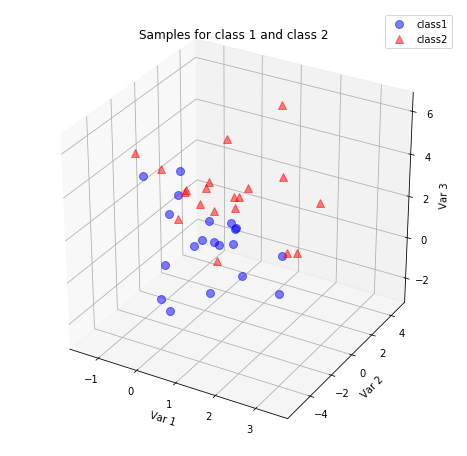

In [37]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[:,0], class1_sample[:,1], class1_sample[:,2], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[:,0], class2_sample[:,1], class2_sample[:,2], '^', markersize=8, alpha=0.5, color='red', label='class2')
ax.set_xlabel('Var 1')
ax.set_ylabel('Var 2')
ax.set_zlabel('Var 3')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

**Calcular el centro y el dataset centrado**

In [39]:
mean_x = np.mean(all_samples[:,0])
mean_y = np.mean(all_samples[:,1])
mean_z = np.mean(all_samples[:,2])

mean_vector = np.array([mean_x,mean_y,mean_z])

print('Mean Vector /centro (de masa) de las muestras:\n', mean_vector)


all_samples_centered=np.zeros(all_samples.shape)
all_samples_centered[:,0]=all_samples[:,0]-mean_x
all_samples_centered[:,1]=all_samples[:,1]-mean_y
all_samples_centered[:,2]=all_samples[:,2]-mean_z

Mean Vector /centro (de masa) de las muestras:
 [ 0.5211348  -0.63198635  1.82547569]


**Matriz de dispersión (scater_matrix) y marriz de covarianza:**

In [40]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[0]):
    #scatter_matrix += ((all_samples[i,:] - mean_vector).reshape(3,1)).dot((all_samples[i,:] - mean_vector).reshape(1,3))
    scatter_matrix += ((all_samples_centered[i,:] ).reshape(3,1)).dot((all_samples_centered[i,:] ).reshape(1,3))
print('Scatter Matrix:\n', scatter_matrix)
cov_matrix=scatter_matrix/(40-1)
print('Covariance Matrix:\n', cov_matrix)

Scatter Matrix:
 [[  53.98926583  -44.60796607   43.74124432]
 [ -44.60796607  246.95296239 -134.97233592]
 [  43.74124432 -134.97233592  259.73652626]]
Covariance Matrix:
 [[ 1.38434015 -1.143794    1.12157037]
 [-1.143794    6.33212724 -3.46082913]
 [ 1.12157037 -3.46082913  6.65991093]]


In [41]:
cov_mat = np.cov([all_samples[:,0],all_samples[:,1],all_samples[:,2]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.38434015 -1.143794    1.12157037]
 [-1.143794    6.33212724 -3.46082913]
 [ 1.12157037 -3.46082913  6.65991093]]


**Cálculo de Vectores y valores propios (aurovectores y autovalores) de ambas matrices** 

Notar que:
* los vectores propios son ortogonales y de norma (o longitud) 1
* los vectores propios de ambas matrices coinciden y los valores propios son proporcionales según el factor (n-1)

In [42]:
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(3,1)
    eigvec_cov = eig_vec_cov[:,i].reshape(3,1)
    assert eigvec_sc.all() == eigvec_cov.all(), 'Autovectores no son idénticos'
    norma=sum(eigvec_cov*eigvec_cov)**0.5

    print('Autovector {} de scatter o cov matrix: \n{}'.format(i+1, eigvec_sc))
    print('Norma de autovector {}: {}'.format(i+1, norma))
    print('Autovalor {} de scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Autovalor {} de covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Factor de escala de los autovalores o valores propios: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Autovector 1 de scatter o cov matrix: 
[[ 0.17772379]
 [-0.68014705]
 [ 0.71120619]]
Norma de autovector 1: 1.0
Autovalor 1 de scatter matrix: 399.74500469289507
Autovalor 1 de covariance matrix: 10.249871915202437
Factor de escala de los autovalores o valores propios:  39.0
----------------------------------------
Autovector 2 de scatter o cov matrix: 
[[-0.98372221]
 [-0.1422871 ]
 [ 0.10974973]]
Norma de autovector 2: 0.9999999999999999
Autovalor 2 de scatter matrix: 42.65707488334738
Autovalor 2 de covariance matrix: 1.0937711508550612
Factor de escala de los autovalores o valores propios:  38.99999999999999
----------------------------------------
Autovector 3 de scatter o cov matrix: 
[[-0.02654951]
 [ 0.71913446]
 [ 0.69436356]]
Norma de autovector 3: 1.0
Autovalor 3 de scatter matrix: 118.27667489277542
Autovalor 3 de covariance matrix: 3.032735253660907
Factor de escala de los autovalores o valores propios:  39.000000000000014
----------------------------------------


**Confirmación que son vectores y valores propios de scatter_matrix: (puede omitirse este bloque)**

In [43]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(3,1)
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
    #print(scatter_matrix.dot(eigv)- eig_val_sc[i] * eigv)    

**Gráfico de vectores propios = nuevas componentes**

Populating the interactive namespace from numpy and matplotlib


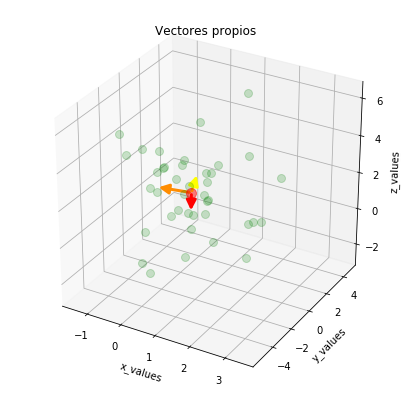

In [44]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[:,0], all_samples[:,1], all_samples[:,2], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)

colr=["r", "darkorange","yellow"]

for i in range(len(eig_val_sc)):
    v=eig_vec_sc[:,i]
    co=colr[i]
    a = Arrow3D([mean_x, (mean_x+v[0])], [mean_y,(mean_y+v[1])], [mean_z, (mean_z+v[1])], mutation_scale=20, lw=3, arrowstyle="-|>", color=co)
    ax.add_artist(a)
#for i in range(len(eig_val_sc)):   
    #a = Arrow3D([mean_x, eig_val_sc[0,i]], [mean_y,  eig_val_sc[1,i]], [mean_z,  eig_val_sc[2,i]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    #ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Vectores propios')

plt.show()

**Confirmación que son vectores unitarios/ de norma o longitud uno (puede omitirse este bloque)**

In [45]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

**Ordena los vectores y valores propios según magnitud de los valores propios**

In [47]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i)

(399.74500469289507, array([ 0.17772379, -0.68014705,  0.71120619]))
(118.27667489277542, array([-0.02654951,  0.71913446,  0.69436356]))
(42.65707488334738, array([-0.98372221, -0.1422871 ,  0.10974973]))


** Se queda con los vectores propios con valores propios más altos**

In [48]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)
porcentaje=(eig_pairs[0][0]+eig_pairs[1][0])/(eig_pairs[0][0]+eig_pairs[1][0]+eig_pairs[2][0])*100
print('describen el ',porcentaje ,'% de la dispersión')

Matrix W:
 [[ 0.17772379 -0.02654951]
 [-0.68014705  0.71913446]
 [ 0.71120619  0.69436356]]
describen el  92.39188670101383 % de la dispersión


**Proyecta sobre el espacio de dimensión k=2, de las componentes principales**

In [49]:
transformed = all_samples_centered.dot(matrix_w)
assert transformed.shape == (40,2), "The matrix is not 40x2 dimensional."

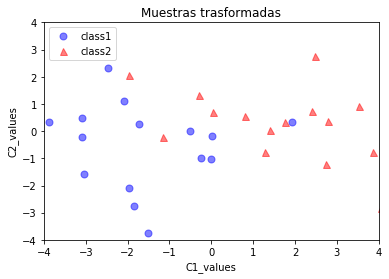

In [50]:
plt.plot(transformed[0:20,0], transformed[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[20:40,0], transformed[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('C1_values')
plt.ylabel('C2_values')
plt.legend()
plt.title('Muestras trasformadas')

plt.show()